In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados carregados e padronizados!")


Dados carregados e padronizados!


In [11]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

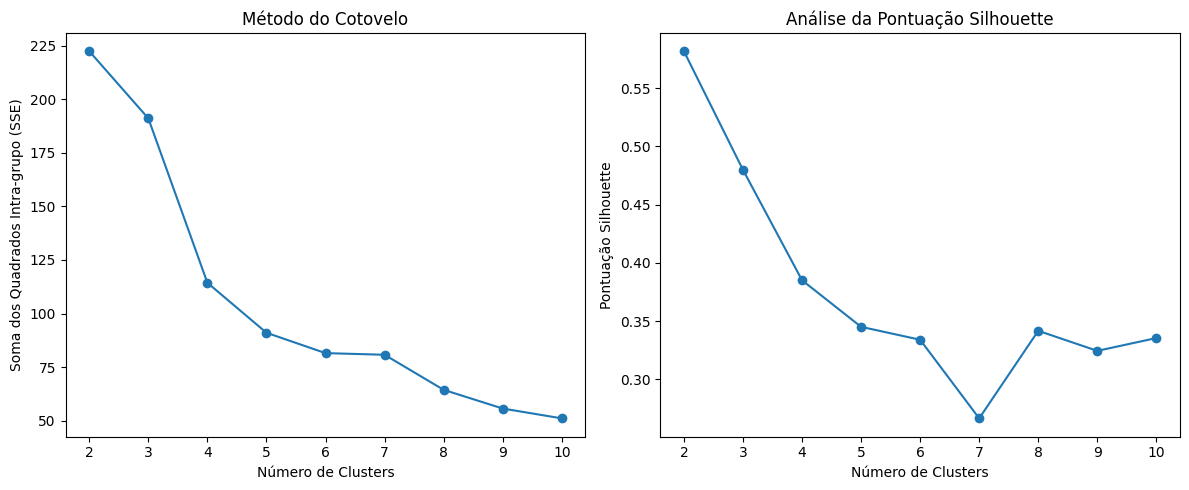

In [6]:
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-grupo (SSE)')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação Silhouette')
plt.title('Análise da Pontuação Silhouette')

plt.tight_layout()
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

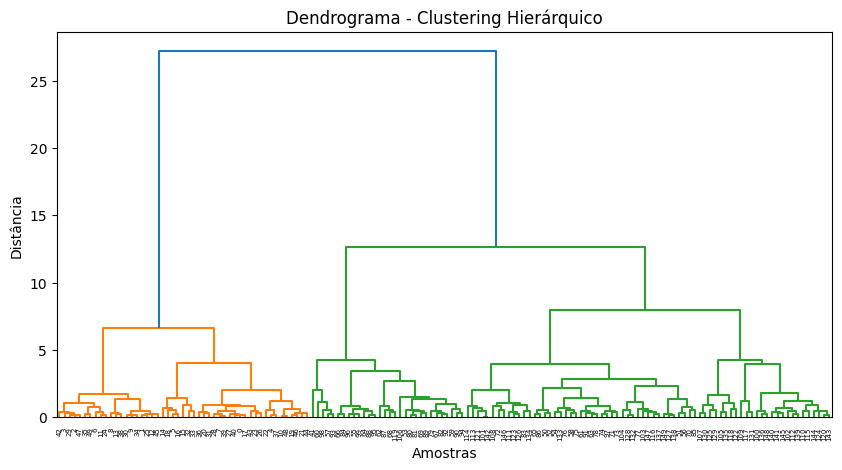

Explicação: O dendrograma mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.


In [8]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()


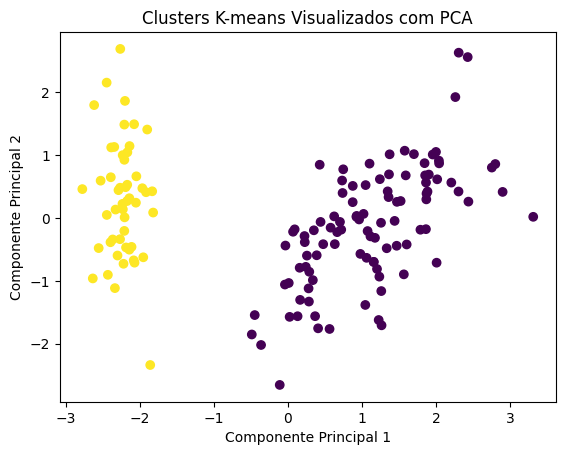

Variância explicada pelos 2 componentes: 95.81%
Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

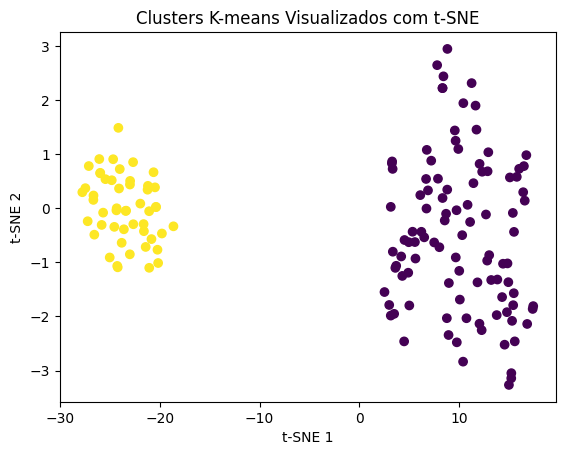

Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.


In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


##Conclusão

Como visto nos gráficos do 'Método do Cotovelo'e 'Análise da Pontuação Silhouette' o número de clusters mais adequado parece ser 2, diferente da divisão original de 3, Isso ocorre porque a Setosa costuma se separar de maneira bastante nítida, enquanto Versicolor e Virginica muitas vezes se misturam em um mesmo grupo, como podemos ver ao “cortar” o dendrograma na faixa que gera dois clusters.

No PCA, ao reduzirmos as dimensões para apenas dois componentes principais, constatamos que essas duas dimensões são suficientes para explicar cerca de 95,81% da variação do conjunto de dados, indicando que a maior parte das informações relevantes já está presente nesses componentes. Por fim, a aplicação do t-SNE reforça essa separação ao evidenciar visualmente uma maior distância entre os grupos no espaço projetado, o que reforça  a ideia de que 2 clusters podem descrever de forma adequada a estrutura desse conjunto de dados.